<img src="https://www.wellcomeconnectingscience.org/wp-content/themes/new_wellcome_connecting_science/dist/assets/svg/logo.svg" alt="WCS Logo" width="150" style="float: left;">
<img src="https://github.com/EveliaCoss/Tutorial_ISCB_LATAM_scATACseq/blob/main/Logo_JAGUAR.png?raw=true" alt="WCS Logo" width="150" style="float: right;">





<h1><center>

# **Differential gene expression analysis**

<h1></center>

Welcome to this tutorial on differential gene expressinon (DGE) analysis using R!

## About the course 📌

This course is part of the Workshop [Single Cell Genomic Approaches to Study the Immune System - Latin America & the Caribbean](https://coursesandconferences.wellcomeconnectingscience.org/event/single-cell-genomic-approaches-to-study-the-immune-system-latin-america-the-caribbean-20241109/) (9-11 Novembrer 2024), Universidad CES, Medellín, Colombia.

- **Date:** 10 November 2024
- **Course duration**: 1 hour 15 minutes

**Speakers:**
- <font color='orange'>Dr Anna Lorenc</font> - Principal bioinformatician at Wellcome Trust Sanger Institute
- <font color='orange'>MPhil Lucia Ramirez Navarro</font> - PhD student at  Wellcome Trust Sanger Institute

**Abstract:** In the last years, the complexity of single-cell RNA-seq studies has increased, leading to more complex study designs where we can have repeated measures or technical batches within the study design. To properly account for this data structure in a DGE analysis, we can benefit from using a linear mixed model instead of a traditional linear model.

This tutorial will guide you on performing DGE with [dreamlet](https://https://www.bioconductor.org/packages/release/bioc/html/dreamlet.html), a library which was inspired on [muscat](https://bioconductor.org/packages/release/bioc/html/muscat.html) and [varianceParition](https://https://www.bioconductor.org/packages/release/bioc/html/variancePartition.html) to perform multi-sample, multi-group and multi-cell-subpopulation DGE analysis. Dreamlet uses a pseudobulk approach coupled with a linear mixed model to give flexibility for complex experimental designs. According to recent [benchmarks](https://https://www.nature.com/articles/s41467-020-19894-4), pseudobulk methods have similar performance as cell-level methods for DGE analysis, while being more efficient in terms of running time and memory usage.

Dreamlet also provides visualization tools and helper functions to explore  additional technical and biological variation (eg. batch effets) in your data.


*The following tutorial was inspired on the dreamlet tutorial*


This tutorial will guide you through the steps to perform DGE analysis, from data preprocessing to result extraction and visualization. The goal is to identify genes that show significant changes in expression levels between different conditions. We will cover:

- **Exploratory data analysis**
- **Running DGE analysis**
- **Extracting and visualizing results**

If you want to come back to the Github, please follow the next link:
*   Github: https://github.com/WCSCourses/Single_Cell_Genomics_ImmuneSys_24

Let's get started!


<center>

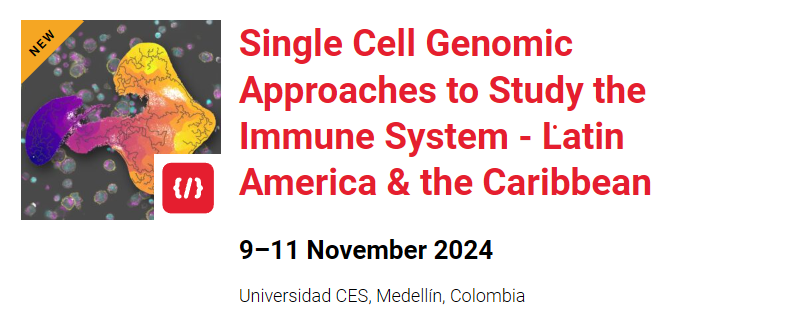

</center>

# **Setting Up the Environment in Google Colab** 💻

Here, we are going to set up the environment the same way that it was initially taught on the first practical.

## Setting up the R Environment in Google Colab

**Configure the Notebook to Use R**
By default, Google Colab uses Python as the programming language. We need to change it to R. Follow these steps:

1.   Click on "Runtime" in the menu bar at the top of the page.
2.   Select "Change runtime type" from the dropdown menu.
3. In the dialog that appears, click on the "Runtime type" dropdown and change it from "Python" to "R".
4. Click "Save" to apply the changes.

## Execute shell commands in R

In this step, we will learn how to execute shell commands from within our R environment in Google Colab. This is particularly useful because the free version of Colab does not natively support showing shell command outputs when using the R kernel.

**Executing shell commands**

In [ ]:
## Function to execute shell commands in Google Colab when running R kernel
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

**Set Up R2U for Efficient Package Installation**

R2U (R to Ubuntu) provides a faster way to install R packages by leveraging the Ubuntu package manager.



In [ ]:
## Setup R2U (R to Ubuntu) for faster package installation in Colab
download.file("https://github.com/eddelbuettel/r2u/raw/master/inst/scripts/add_cranapt_jammy.sh",
              "add_cranapt_jammy.sh")
Sys.chmod("add_cranapt_jammy.sh", "0755")
shell_call("./add_cranapt_jammy.sh")
bspm::enable()
options(bspm.version.check = FALSE)
shell_call("rm add_cranapt_jammy.sh")

53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists...
Building dependency tree...
Reading state information...
ca-certificates is already the newest version (20240203~22.04.1).
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
wget is already the newest version (1.21.2-2ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQINBFM+sY8BEADA70T+U0/2WNjOTLvytuXLvBC4vgA8hYvOaBS1cL3d8lu4mwr4
W84/6p4v/mXle/0eIO2D2g+XfK72ZHZxpS+bb7yPxrkCDLGxwUd/khtTJHSbbKFo
J73AsABflMe+8qv+E74+QTiXErTCNioFRz18sa0EvOnEAiokau6TZVYY2z9YjBNI
yEjTi+z+g8c1RL6VmrFEpTicTpafOLbkRyw0VKnAKG7Ytp3Ksc1G9/IAoKw3Q9La
0DJb5iX6hyB7+PNid6htK4LtPKZ2dNSrnRvNNkjj5BgcM2AT1hmxbzHNzIVmPoKA
CQFrkdjog3/PcyjdtZG7cfoSDXrbIAZeAa2ngLv9C/DJatVDd6maPOe66gLo7+As
ErMvO9vtiouqLdurW+Lhx0jFW9Ca3g1taLfbSDyS3X1mOGWcisbQvBqkIuoDQTeS
V4Z04wrwTZ1HtweKG/s5fmPtZNGWVI5YNRLIwdmbGzFTMPu2XTAOd+xSK2H+46Kh
Sh4kFeP6pBh5No

Tracing function "install.packages" in package "utils"



## Installing and loading required packages

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

if (!require("dreamlet", quietly = TRUE))
    BiocManager::install("dreamlet")

if (!require("ExperimentHub", quietly = TRUE))
    BiocManager::install("ExperimentHub")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'dreamlet'

also installing the dependencies ‘EnrichmentBrowser’, ‘zenith’


Old packages: 'edgeR', 'GenomicRanges', 'gert', 'rstudioapi'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'ExperimentHub'

Old packages: 'edgeR', 'GenomicRanges', 'gert', 'rstudioapi'



**Loading packages**

In [ ]:
suppressPackageStartupMessages({
  library(dreamlet)
  library(ExperimentHub)
  })
print('Libraries loaded!')

[1] "Libraries loaded!"


One of the advantages of dreamlet is that it can use multiple cores and run things in parallel. This is quite useful when working on a High Perfomance Computing (HPC) cluster where you can have multiple cores available.

Also, depending on your model, your computer might also have multiple cores, meaning that it can run multiple applications at once and run more complex software. In the case of google collab, we have two available cores



In [ ]:
param = SnowParam(2, "SOCK")
register(param)

We are also gonna increase the size of our plots.

In [ ]:
# Set the size of the plots (width and height in inches)
options(repr.plot.width = 15, repr.plot.height = 10)

# 1️⃣ **Preprocess data**

For this tutorial, we are going to use a PBMC dataset from lupus patients that had single-cell data before and after 6h-treatment with interferon-β (Kang, et al, 2018, Nature Biotech).

To download this dataset we are going to use the library [ExperimentHub](https://bioconductor.org/packages/release/bioc/html/ExperimentHub.html), which provides a central location where curated data from experiments, publications or training courses can be accessed.



In [ ]:
# Download data, specifying EH2259 for the Kang, et al study
eh <- ExperimentHub()
sce <- eh[["EH2259"]]
sce

muscData not installed.
  Full functionality, documentation, and loading of data might not be possible without installing

downloading 1 resources

retrieving 1 resource

loading from cache



class: SingleCellExperiment 
dim: 35635 29065 
metadata(0):
assays(1): counts
rownames(35635): MIR1302-10 FAM138A ... MT-ND6 MT-CYB
rowData names(2): ENSEMBL SYMBOL
colnames(29065): AAACATACAATGCC-1 AAACATACATTTCC-1 ... TTTGCATGGTTTGG-1
  TTTGCATGTCTTAC-1
colData names(5): ind stim cluster cell multiplets
reducedDimNames(1): TSNE
mainExpName: NULL
altExpNames(0):

## Exercise 1: Metadata exploration

Explore the metadata and see how many donors and clusters are in our data

In [ ]:
# Write your code here!

In [ ]:
# @title Solutions to exercise 1 {"display-mode":"form"}
# @markdown Click in "Show code" to reveal the solution


message("Number of donors: ", length(unique(colData(sce)$ind)))
message("Number of clusters: ", length(unique(colData(sce)$cluster)))
unique(colData(sce)$cell)

Number of donors: 8

Number of clusters: 10



[1] CD4 T cells       CD14+ Monocytes   Dendritic cells   NK cells         
[5] CD8 T cells       B cells           Megakaryocytes    FCGR3A+ Monocytes
[9] <NA>             
8 Levels: B cells CD14+ Monocytes CD4 T cells CD8 T cells ... NK cells

## Data QC

We are going to do some basic QC on this data where we are going to keep singlets,  cells that have cell type annotation and at least 400 genes expressed. Remember that QC is a very important step as it will determine the quality of the data you will analyse. Additionally, metrics will change depending on your study (eg tissue, condition, etc).








In [ ]:
# only keep singlet cells with sufficient reads
sce <- sce[, colData(sce)$multiplets == "singlet"]
sce <- sce[,!is.na(colData(sce)$cell) ]
sce <- sce[,colSums(counts(sce) > 0) > 400]

message("Number of cells left: ", dim(sce)[1])

message("Number of cells per cluster: ")
table(colData(sce)$cell)

Number of cells left: 35635

Number of cells per cluster: 




          B cells   CD14+ Monocytes       CD4 T cells       CD8 T cells 
             2278              4863              8981              1620 
  Dendritic cells FCGR3A+ Monocytes    Megakaryocytes          NK cells 
              422              1484               177              1554 

For this tutorial, we will focus on CD4+ T cells, CD8+ T cells,  B cells and Dendritic cells so that it can run faster

In [ ]:

sce <- sce[,colData(sce)$cell %in% c("CD4 T cells", "CD8 T cells", "B cells", "Dendritic cells")]
message("Number of cells left: ", dim(sce)[1])

Number of cells left: 35635



## Aggregate to pseudobulk

Dreamlet performs DGE analysis at the pseudobulk-level. Therefore, we first need to aggregate the counts per sample and cluster. This is performed with the function aggregateToPseudoBulk which sums the raw counts across cells for a given sample and cell type.

To run this function, we need to a unique identifier for each sample, the cluster information and the raw counts. The resulting output is still a SingleCellExperiment object but with the aggregated counts.

In [ ]:
# We need to treat individual as a string to avoid the method thinking this is numeric
print(unique(sce$ind))
sce$ind <- paste0("D", sce$ind)
print(unique(sce$ind))

[1] 1039 1488 1256  107 1016 1015 1244  101
[1] "D1039" "D1488" "D1256" "D107"  "D1016" "D1015" "D1244" "D101" 


In [ ]:
# The unique identifier will be created with the individual ID
# (indicated by ind) and the stimulus status (indicated by stim)
sce$id <- paste0(sce$stim, sce$ind)

# Create pseudobulk data by specifying cluster_id and sample_id
# Count data for each cell type is then stored in the `assay` field
# assay: entry in assayNames(sce) storing raw counts
# cluster_id: variable in colData(sce) indicating cell clusters
# sample_id: variable in colData(sce) indicating sample id for aggregating cells
pb <- aggregateToPseudoBulk(sce,
  assay = "counts",
  cluster_id = "cell",
  sample_id = "id",
  verbose = FALSE
)

pb

class: SingleCellExperiment 
dim: 35635 16 
metadata(2): agg_pars aggr_means
assays(4): B cells CD4 T cells CD8 T cells Dendritic cells
rownames(35635): MIR1302-10 FAM138A ... MT-ND6 MT-CYB
rowData names(2): ENSEMBL SYMBOL
colnames(16): ctrlD101 ctrlD1015 ... stimD1256 stimD1488
colData names(3): ind stim multiplets
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

Compared to the previous single cell object, we now had one assay per cell type which contains the aggregated counts

In [ ]:
# Assays in our original single cell object
assayNames(sce)

[1] "counts"

In [ ]:
# Now, we have one 'assay' per cell type
assayNames(pb)

[1] "B cells"         "CD4 T cells"     "CD8 T cells"     "Dendritic cells"

# 2️⃣ **Data normalization**






We are going to normalize the pseudobulk counts within each cell cluster using the function processAssays(). Before normalization, the function filters both samples and genes.

First it retains samples with at least min.cells (the default is 5) in a given cell type. While dropping a few samples usually is not a problem, in some cases dropping samples can mean that a variable included in the regression formula no longer has any variation. For example, dropping all stimulated samples from the analysis in a given cell type, would mean that the variable stim has no variation and is perfectly colinear with the intercept term. This colinearity issue is detected internally and variables with these problem are dropped from the regression formula for that particular cell type. The number of samples retained and the resulting formula used in each cell type can be accessed on the section details.

The function also keeps genes if they have at least min.count (default = 5) reads in at least min.prop (default = 0.4) fraction of the samples. Filtering out genes that are lowly expressed is useful because it decreases the multiple testing burden on our DGE analysis.


Finally, the function normalizes the data for each cell cluster. In this case, we will account for the stimulation status **HOWEVER** we should also account for the donor effect by adding the donor covariate as a random effect. Adding a random effect makes the analysis more complex and takes more time to run, so we will not do it in this tutorial.

In [ ]:
# Normalize and apply voom/voomWithDreamWeights
res.proc <- processAssays(pb, ~stim , min.count = 5, min.cells = 5, min.prop = 0.4)

# Add donor as random effect
# res.proc <- processAssays(pb, ~stim + (1|ind), min.count = 5, min.cells = 5)

# the resulting object of class dreamletProcessedData stores
# normalized data and other information
res.proc

  B cells...
0.82 secs

  CD4 T cells...
1.5 secs

  CD8 T cells...
0.32 secs

  Dendritic cells...
0.34 secs



class: dreamletProcessedData 
assays(4): B cells CD4 T cells CD8 T cells Dendritic cells
colData(3): ind stim multiplets
metadata(3): cell id cluster
Samples:
 min: 16 
 max: 16
Genes:
 min: 926 
 max: 5150 
details(7): assay n_retain ... n_errors error_initial


We can now see the details and see which samples were dropped from which cluster

In [ ]:
details(res.proc)

assay,n_retain,formula,formDropsTerms,n_genes,n_errors,error_initial
<chr>,<int>,<chr>,<lgl>,<int>,<int>,<lgl>
B cells,16,~stim,FALSE,2108,0,FALSE
CD4 T cells,16,~stim,FALSE,5150,0,FALSE
CD8 T cells,16,~stim,FALSE,926,0,FALSE
Dendritic cells,16,~stim,FALSE,1090,0,FALSE


# 3️⃣ **Variance partitioning**

Before performing DGE, it is useful to perform an exploratory analysis and assess the percentage of variance that is explained by different covariates and not just the one you are interested in. This is done with the variancePartition package, which uses linear and linear mixed models to quanify the contribution of multiple sources of expression variation at the gene-level. For each gene it fits a linear (mixed) model and evaluates the fraction of expression variation explained by each variable.

Variance fractions can be visualized at the gene-level for each cell type using a bar plot, or genome-wide using a violin plot.

To showcase the power of VariancePartition, we are going to artificially create two batches where four individuals were processed first and then, the other four.

In [ ]:
colData(res.proc)$batch <- 0
colData(res.proc)$batch[colData(res.proc)$ind %in% c("D101", "D1244", "D1488", "D107")] <- 1
colData(res.proc)

,ind,stim,multiplets,batch
,<chr>,<fct>,<fct>,<dbl>
ctrlD101,D101,ctrl,singlet,1
ctrlD1015,D1015,ctrl,singlet,0
ctrlD1016,D1016,ctrl,singlet,0
ctrlD1039,D1039,ctrl,singlet,0
ctrlD107,D107,ctrl,singlet,1
ctrlD1244,D1244,ctrl,singlet,1
ctrlD1256,D1256,ctrl,singlet,0
ctrlD1488,D1488,ctrl,singlet,1
stimD101,D101,stim,singlet,1


For covariates with multiple categories, it is useful to model them as random effects instead of fixed effects.

If we wanted to model stimulation status and batch as random effects we would use the following formula:*~ (1|stim) + (1|batch)*. Numerical covariates are never modelled as random effects.

In [ ]:
# run variance partitioning analysis
vp.lst <- fitVarPart(res.proc, formula = ~stim + batch)


  B cells...
9.9 secs

  CD4 T cells...
24 secs

  CD8 T cells...
4.3 secs

  Dendritic cells...
5 secs






We can see that stimulation status is explaining more variance than batch

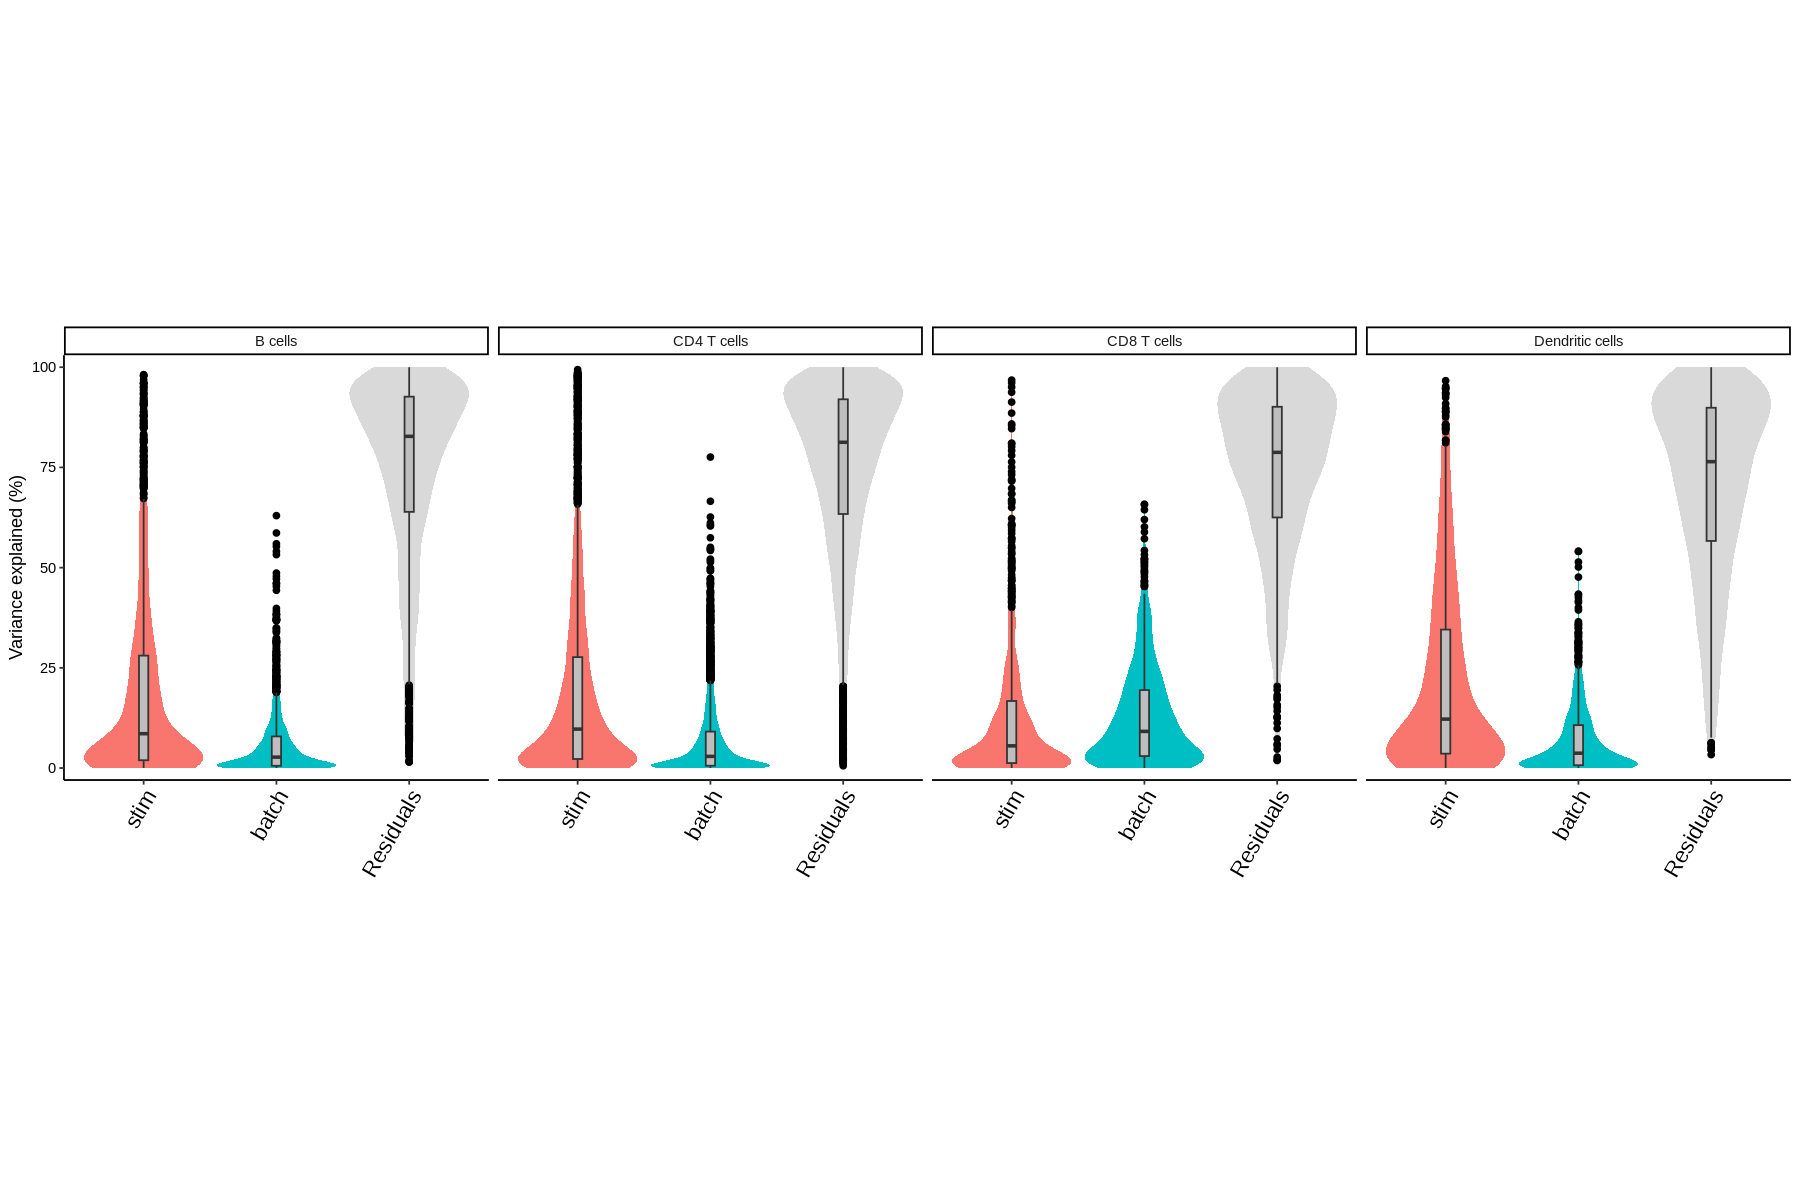

In [ ]:
# Summarize variance fractions genome-wide for each cell type
plotVarPart(vp.lst, label.angle = 60, ncol = 4)

Another popular way to examine your data is to perform a PCA analysis and colour each sample by different covariates in your data. The idea is that the first PCs should be strongly correlated with your covariate of interest.

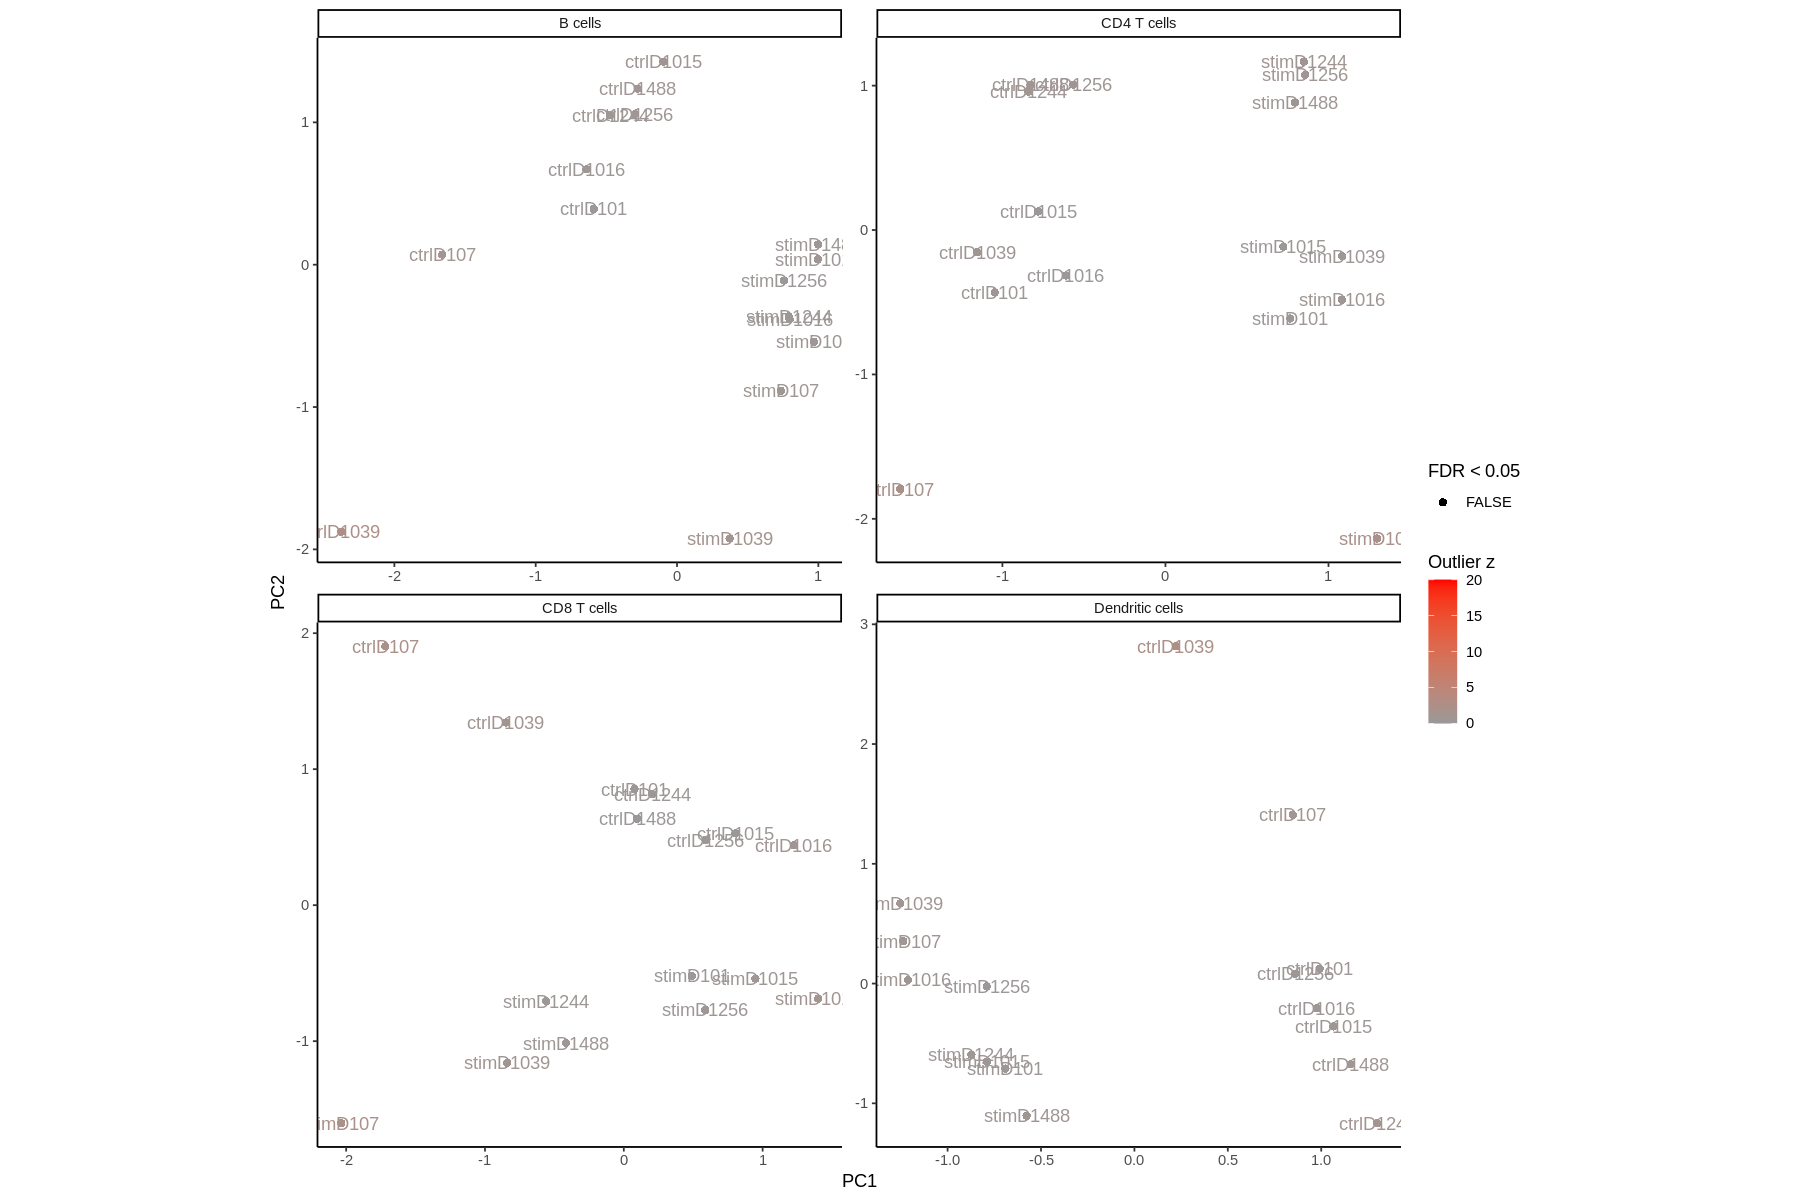

In [ ]:

plotPCA(res.proc) +
  geom_text(aes(label = ID))

# 4️⃣ **Differential expression**

Now that we have make sure that there are no major batch effects in our data, we can proceed to run the DGE analysis for each cluster. This is done with the dreamlet function. Here we need to use the same formula we used in the normalization step with the function processAssays

In [ ]:
# Differential expression analysis within each assay,
# evaluated on the voom normalized data
res.dl <- dreamlet(res.proc, ~stim)

  B cells...
0.62 secs

  CD4 T cells...
1.2 secs

  CD8 T cells...
0.21 secs

  Dendritic cells...
0.3 secs



In this case, we only accounted for stimulation so we have the intercept and the stimulation.

In [ ]:
# names of estimated coefficients
coefNames(res.dl)

[1] "(Intercept)" "stimstim"

The output is an object of dreamletResult with the results per cluster which can then be used for other downstream analysis and plotting.

In [ ]:
res.dl

class: dreamletResult 
assays(4): B cells CD4 T cells CD8 T cells Dendritic cells
Genes:
 min: 926 
 max: 5150 
details(7): assay n_retain ... n_errors error_initial
coefNames(2): (Intercept) stimstim

## Volcano plots

Dreamlet provides helper functions to create volcano plots which show the strength of the differential expression signal in each cell type.

In this case, red points indicate FDR < 0.05 and we can see we have many significant genes.



Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text_repel()`).”


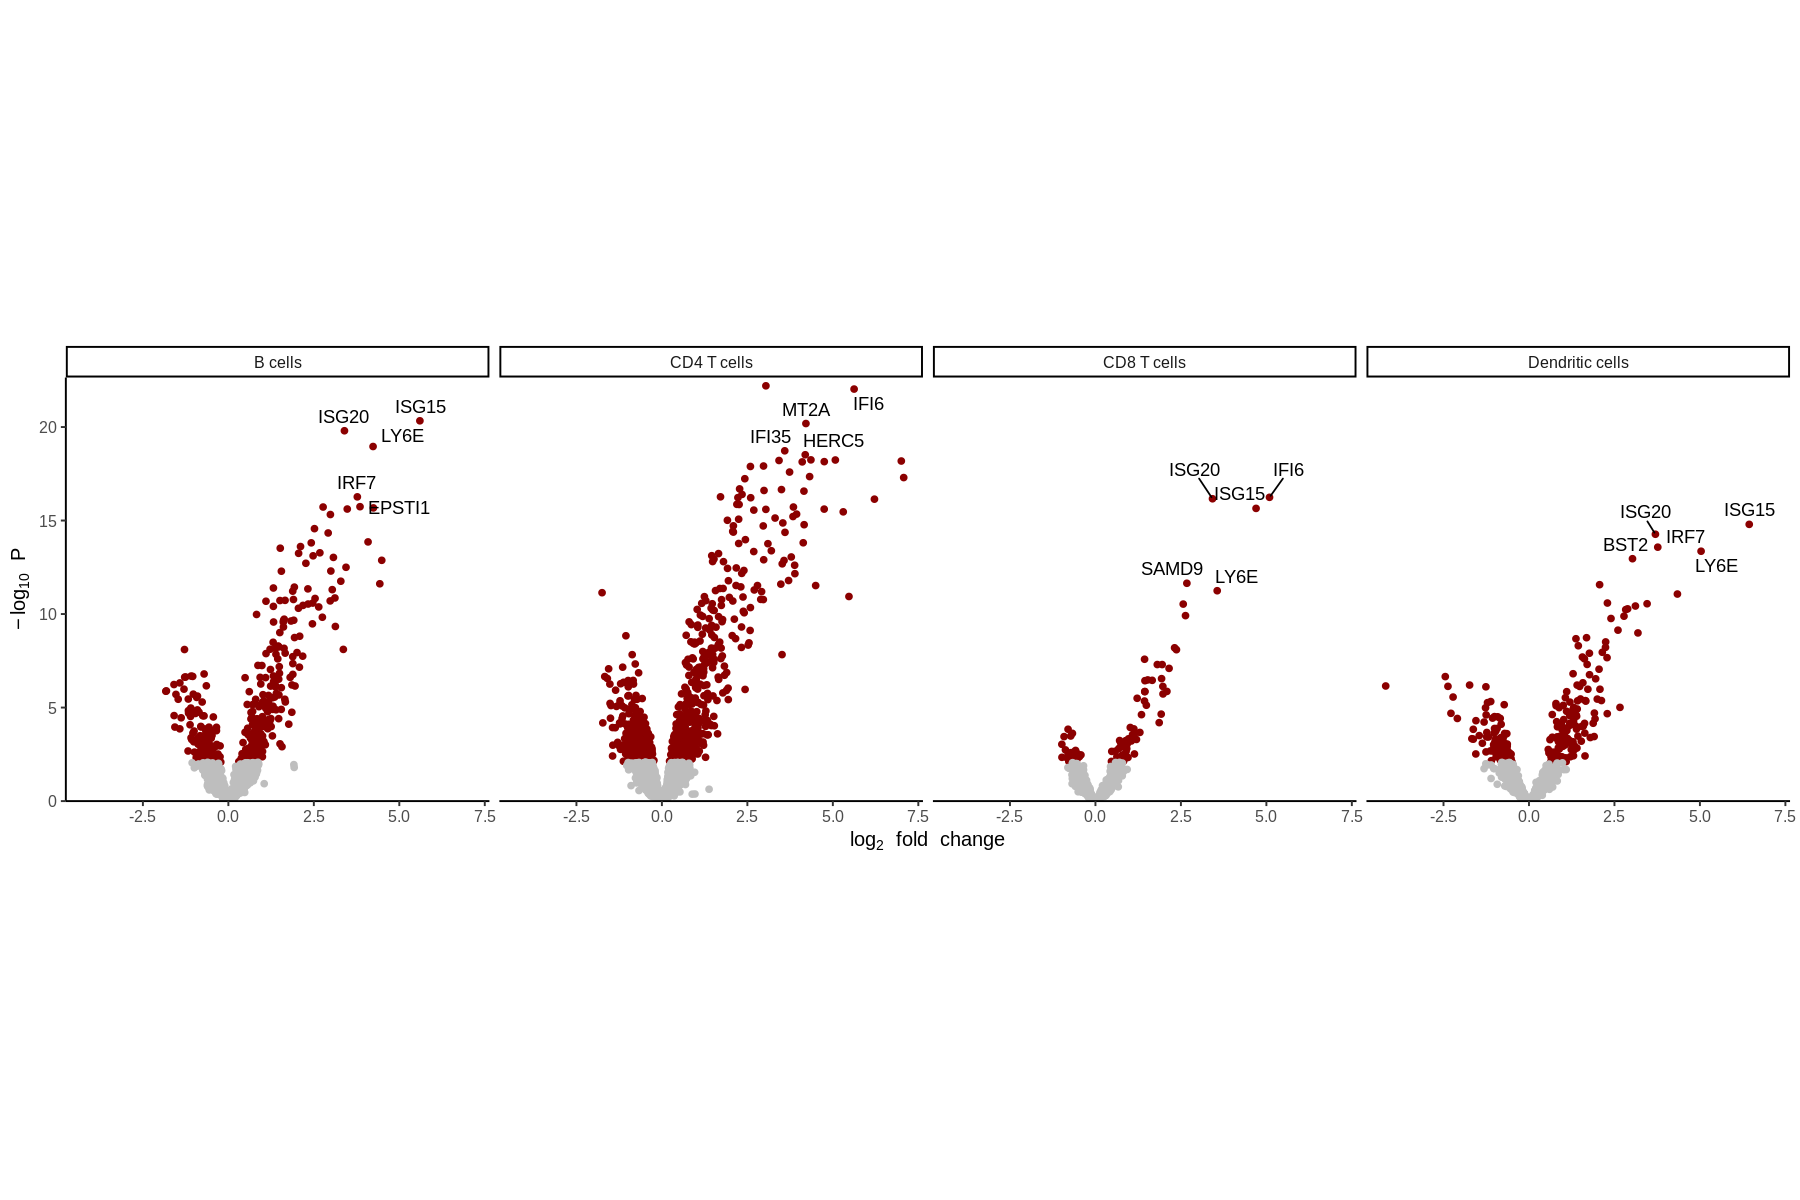

In [ ]:
plotVolcano(res.dl, coef = "stimstim",  ncol = 4)

## Gene-level heatmap

We can also create heatmaps and visualize the z-statistic (which is similar to a logFC) for each cell type and specified gene. Grey indicates that insufficient reads were observed to include the gene in the analysis.



Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


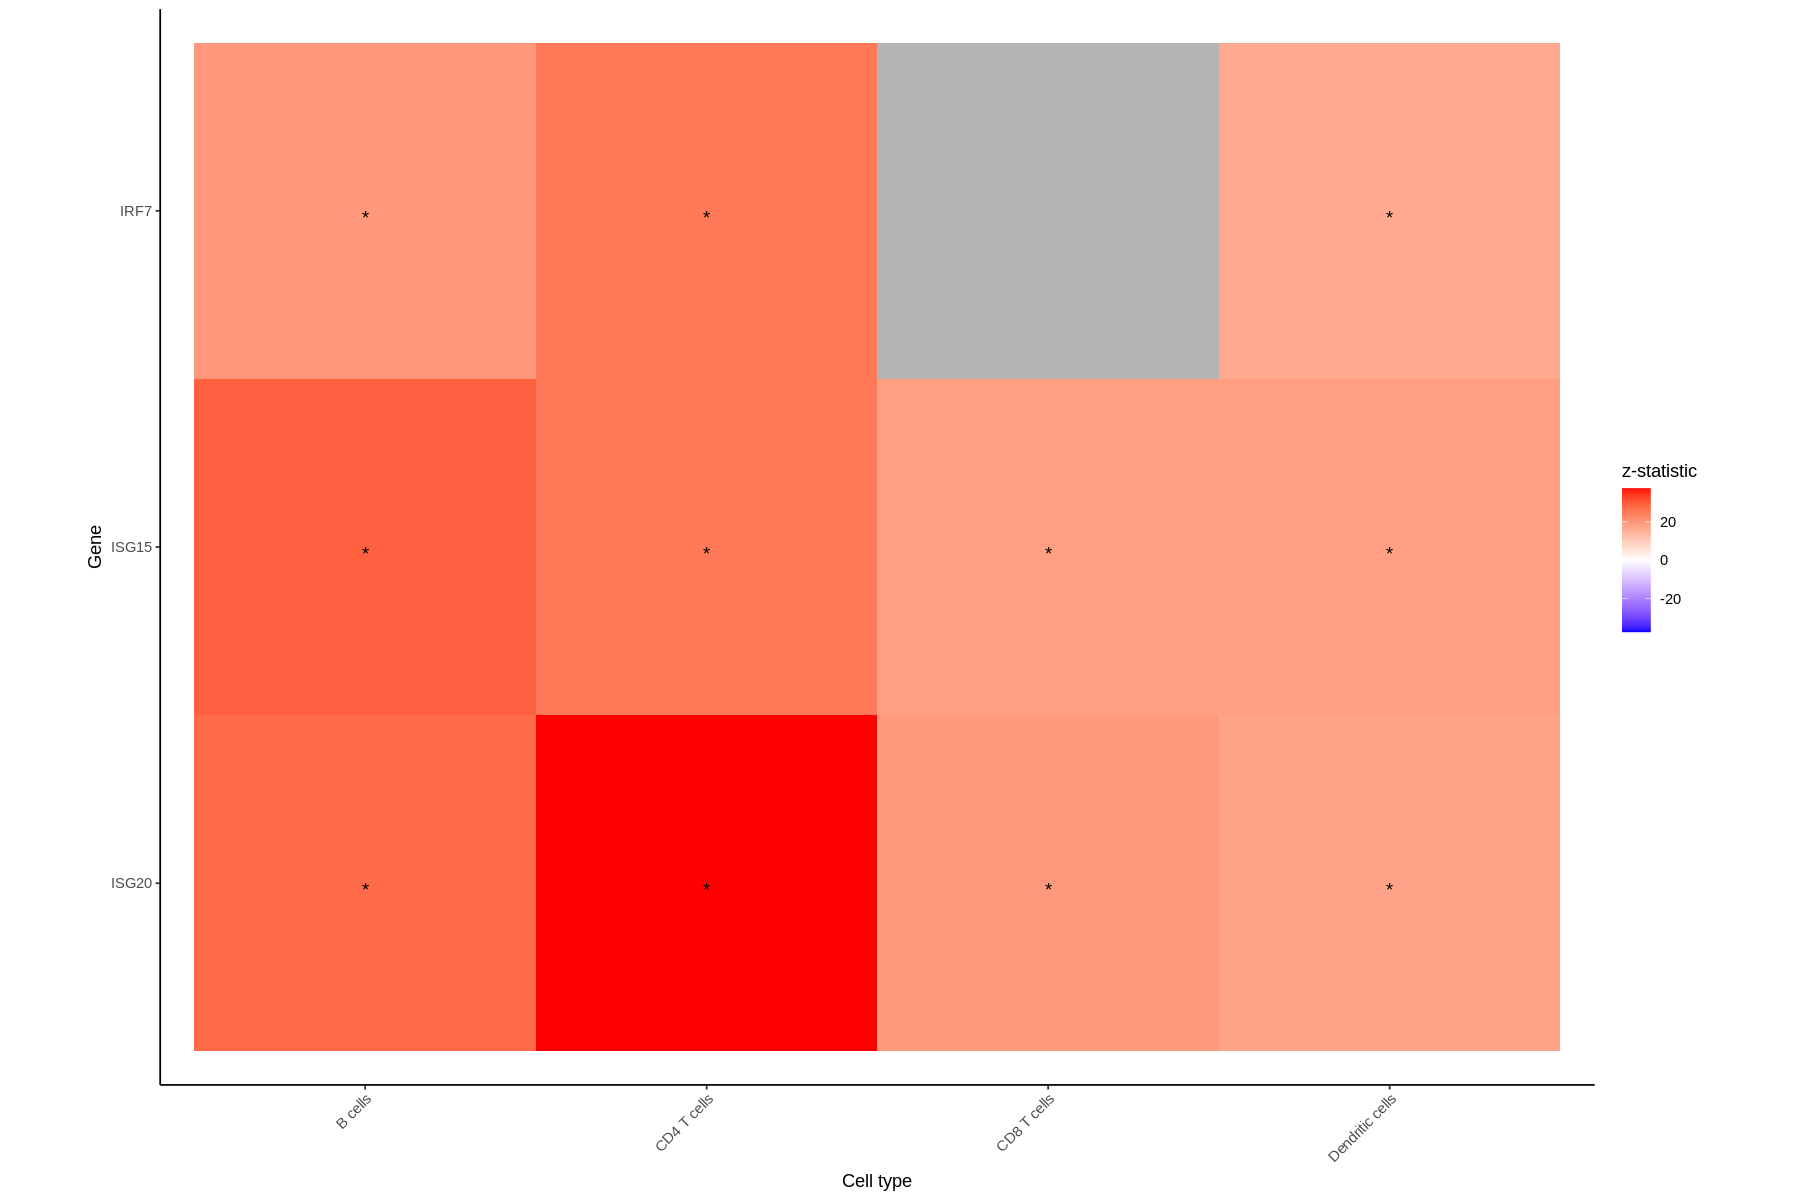

In [ ]:
genes <- c("ISG20", "ISG15", "IRF7")
plotGeneHeatmap(res.dl, coef = "stimstim", genes = genes)

## Extract results

We can also extract the results in a table using topTable which shows the gene name, log fold change, average expression, t-statistic, p-value, FDR (i.e. adj.P.Val).



In [ ]:
# Results from full analysis
# Number specifies how many genes we want. By default, it shows the top 10 based on the p-value
# We can use number = Inf to show all genes
topTable(res.dl, coef = "stimstim", number = 10)

DataFrame with 10 rows and 9 columns
         assay          ID     logFC   AveExpr         t     P.Value
   <character> <character> <numeric> <numeric> <numeric>   <numeric>
1  CD4 T cells       ISG20   3.04183  10.41804   37.4255 6.26752e-23
2  CD4 T cells        IFI6   5.62195   8.52426   36.8009 9.35429e-23
3      B cells       ISG15   5.60217  10.26631   28.9968 4.65570e-21
4  CD4 T cells        MT2A   4.21241   7.82031   30.7686 6.51632e-21
5      B cells       ISG20   3.39542  11.31739   27.5979 1.58368e-20
6      B cells        LY6E   4.23249   8.80197   25.5089 1.10298e-19
7  CD4 T cells       IFI35   3.59318   6.90268   26.6771 1.86981e-19
8  CD4 T cells       HERC5   4.19268   6.74801   26.1281 3.04269e-19
9  CD4 T cells     TNFSF10   4.35869   7.50564   25.4347 5.70564e-19
10 CD4 T cells       ISG15   5.07297  10.14761   25.4161 5.80370e-19
     adj.P.Val         B     z.std
     <numeric> <numeric> <numeric>
1  4.33759e-19   42.5497   37.4255
2  4.33759e-19   41.8730   36.

We can also select a specific cluster.

In [ ]:
# only B cells
topTable(res.dl[["B cells"]], coef = "stimstim")

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ISG15,5.602175,10.266312,28.99685,4.655705e-21,9.814226e-18,38.16213
ISG20,3.395422,11.317387,27.59788,1.583685e-20,1.669204e-17,37.04181
LY6E,4.232490,8.801974,25.50888,1.102982e-19,7.750287e-17,34.96047
IRF7,3.772251,8.629354,19.77108,5.422260e-17,2.857531e-14,28.92359
EPSTI1,3.850696,8.025849,18.79553,1.820641e-16,6.359521e-14,27.70087
UBE2L6,2.771031,9.202291,18.76288,1.897769e-16,6.359521e-14,27.67751
PLSCR1,4.242354,8.213949,18.67900,2.111795e-16,6.359521e-14,27.55993
EIF2AK2,3.477859,7.479510,18.57003,2.427786e-16,6.397217e-14,27.38147
TRIM22,2.984380,7.182116,18.04925,4.774790e-16,1.118362e-13,26.71025


## Exercise 2

Find how many genes are significant (with an adj.P.Val < 0.05) in more than one cluster.

In [ ]:
# Write your code here!

In [ ]:
# @title Solutions to exercise 2 {"display-mode":"form"}
# @markdown Click in "Show code" to reveal the solution.


# Extract all genes
df <- topTable(res.dl, coef = "stimstim", number = Inf)

# Filter genes that are significant with an adj.P.Val < 0.05
df <- df[df$adj.P.Val < 0.05,]

# Find genes that are significant in multiple clusters
# If they are significant in multiple clusters, means that they are duplicated and we can use
# the duplicated function to find them
genes <- df$ID[duplicated(df$ID)]
message("Number of genes: ", length(genes))

Number of genes: 458



## Exercise 3

From those genes you identified in exercise 2. Can you identify some that have different directions of effects from their logFC (eg. downregulated or upregulated upon stimulation)?

In [ ]:
# Write your code here!

In [ ]:
# @title Solutions to exercise 3
# @markdown Click in "Show code" to reveal the solution.

# Filter to genes that are significant in multiple clusters
df_subset <- df[df$ID %in% genes,]

# Check if they have the same direction of effect
# We can use the tapply function which will iterate the values of the logFC
# column based on the groups defined in ID (gene names)
# Basically, for each gene name we are testing if all are positive or negative
i <- tapply(df$logFC, df$ID, function(x) {
  all(x > 0) || all(x < 0)
  })

# We can see now that there are 4 genes that are not consistent in their direction
print(table(i))

# Get the names
gene_names <- names(i[i == FALSE])
print(gene_names)

i
FALSE  TRUE 
    4  1102 
[1] "COTL1"   "ENO1"    "HERPUD1" "ITM2C"  


## Exercise 4

Plot a heatmap with the genes from exercise 3.

In [ ]:
# Write your code here!

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_text()`).”


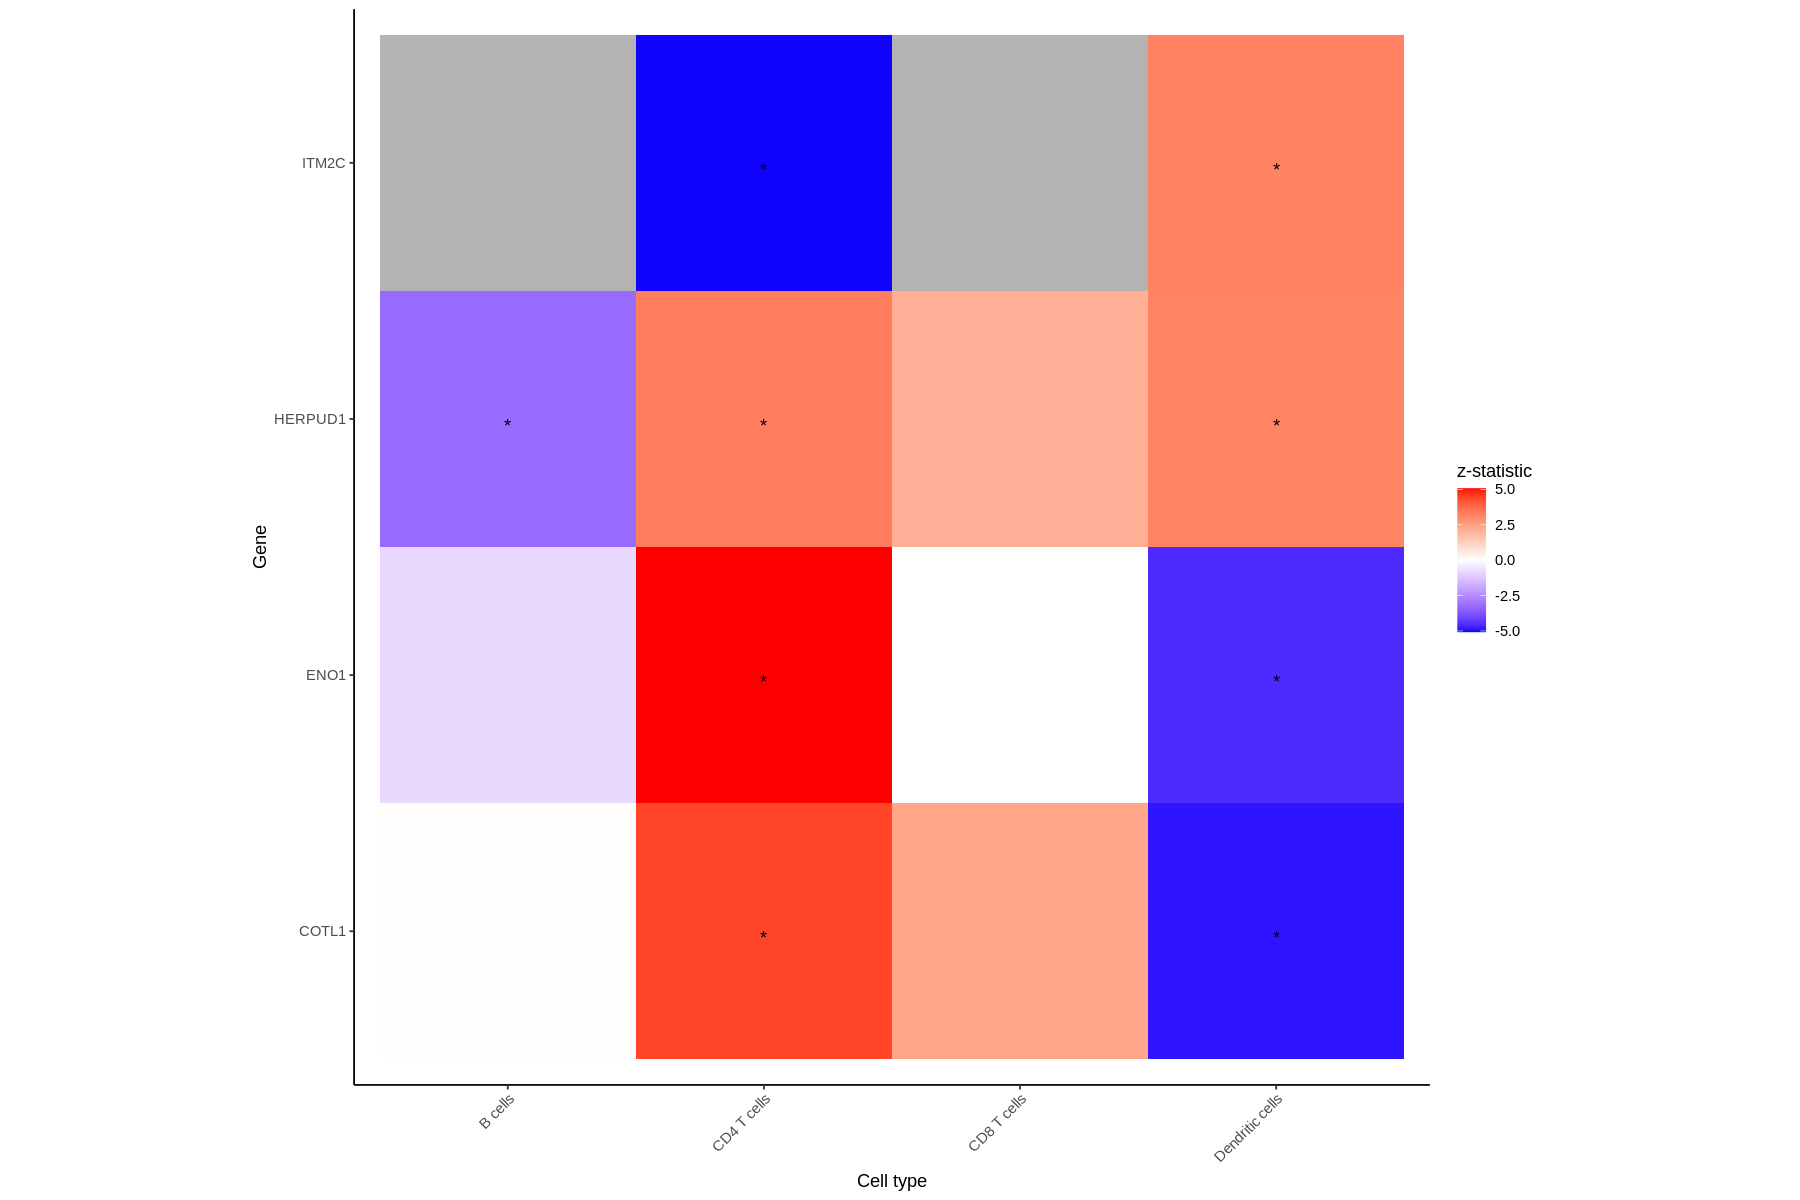

In [ ]:
# @title Solutions to exercise 4 {"display-mode":"form"}
# @markdown Click in "Show code" to reveal the solution.

plotGeneHeatmap(res.dl, coef = "stimstim", genes = gene_names)

This is an easy way to detect differences upon stimulation across our clusters, however if your main goal is to detect conserved and cell type specific differences, there are more robust and statistical methods such as mashR that can help you achieve this.


The problem with this approach is that we have different number of patients (if you remember from the first section, some samples were dropped from the cluster of dendritic cells). Similarly, the total read counts and number of genes will be different across clusters. Dreamlet has also a very nice and easy to follow [tutorial about using mashR](https://https://diseaseneurogenomics.github.io/dreamlet/articles/mashr.html) after performing DGE, so check it out if you have any more questions about it!



# 📒 **Summary**

In this tutorial, we perform a DGE analysis using the dreamlet library. First, we examine our data and learnt different ways to ensure the quality of our data. Next, we perform a DGE analysis and through a series of exercises, we explored the characteristics of the significant genes and learnt different ways to visualize our results.

Hopefully, this tutorial should serve as a foundation for performing your own DGE analysis and interpret the results. Feel free to extend this analysis with other datasets and more complex models. Also, check the [dreamlet documentation](https://https://diseaseneurogenomics.github.io/dreamlet/articles/dreamlet.html)! They provide different tutorials about using more complex models, performing gene set enrichment analysis afterwards, and so on.

# ☕ *Coffee break ☕ (30 min) - (15:15-15:45 h)*